<font size ="6"> **Linear Regression for Life Expectancy** </font>

## **Importing the libraries and dataset** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('LifeExpectancyDataset.csv')
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
print(dataset.shape,'\n')
print(dataset.describe,'\n')
dataset.isnull().sum(axis=0)

(2938, 22) 

<bound method NDFrame.describe of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis 

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Text(50.0, 0.5, 'Null values')

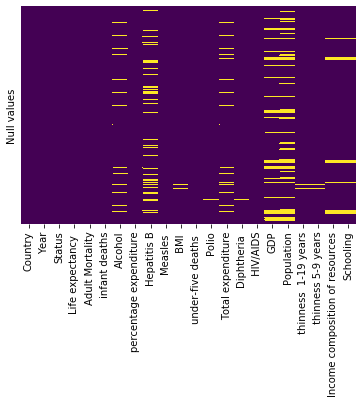

In [4]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.ylabel('Null values')

## **Data Insight**

Text(0.5, 1.0, 'Relation between Thinness and Life Expectancy')

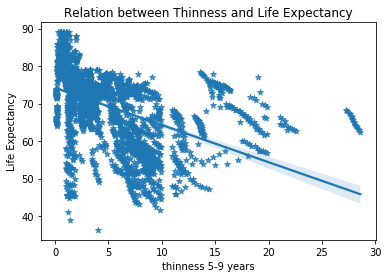

In [5]:
x, y = pd.Series(dataset[' thinness 5-9 years'], name="thinness 5-9 years"), pd.Series(dataset['Life expectancy '], name="Life Expectancy")
ax = sns.regplot(x=x, y=y, marker="*")
plt.title('Relation between Thinness and Life Expectancy')

## **Cleaning the dataset**

2938


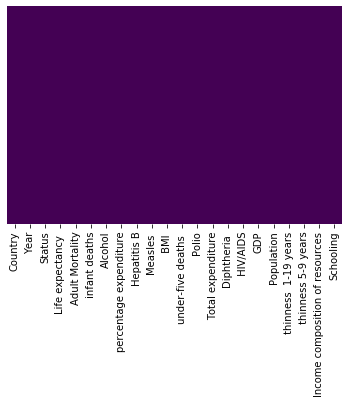

In [6]:
dataset = dataset.fillna(dataset.median())
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(dataset.shape[0])

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset['Status'] = lb.fit_transform(dataset['Status'])

## **Splitting the dataset**

In [8]:
dataset = dataset.drop(['Country'],axis=1)
X = dataset.drop(['Life expectancy '], axis=1).values
y = dataset['Life expectancy '].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=30)

## **Training and prediction**

In [9]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)

y_predict = lreg.predict(X_test)

from sklearn.metrics import mean_squared_error,accuracy_score
print('accuracy : {}%'.format(lreg.score(X_test,y_test)*100))
print('rms error : {}'.format(np.sqrt(mean_squared_error(y_test,y_predict))))

accuracy : 82.11227242891339%
rms error : 4.11225965996175


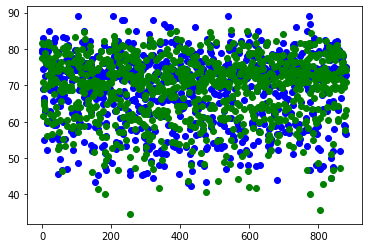

In [10]:
plt.plot(y_test,'bo')
plt.plot(y_predict,'go')